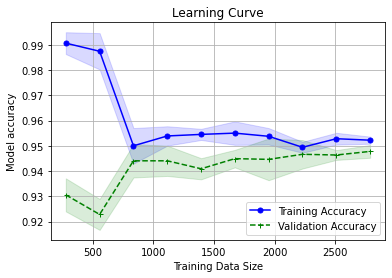

Training set score: 0.950211
Training set loss: 0.151885
The accuracy is:  95.05016722408027 %
Execution time in seconds: 0.5327582359313965


C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


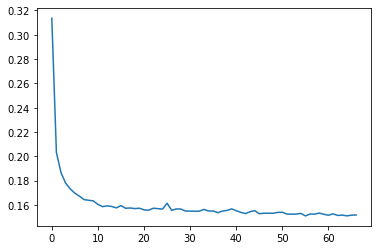

In [18]:
import numpy as np
import pandas as pd
import statistics as s
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
x=data.drop(["stroke"],axis=1)
y=data["stroke"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape
'''
k=np.arange(100,300)
train_score, test_score = validation_curve(MLPClassifier(), x_train, y_train, param_name='max_iter', param_range=k, scoring="accuracy",cv=5)
plt.plot(k, train_score.mean(axis=1),marker='o', markersize=5,color='blue', label='Training Accuracy')
plt.plot(k, test_score.mean(axis=1),marker='o', markersize=5,color='green', label='Validation Accuracy')
plt.xlabel('max_iteration')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
'''
# Normalize feature data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#learning curve
train_size, train_score2, test_score2=learning_curve(MLPClassifier(activation='relu',random_state=42,max_iter=1000,learning_rate_init=0.01, hidden_layer_sizes=(100,)), x_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy",cv=5)
train_mean = np.mean(train_score2, axis=1)
test_mean = np.mean(test_score2, axis=1)
train_std = np.std(train_score2, axis=1)
test_std = np.std(test_score2, axis=1)
plt.plot(train_size, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_size, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

##Neural Network
import time
startTime = time.time()
dt = MLPClassifier(activation='relu',learning_rate='adaptive',random_state=42,max_iter=175,learning_rate_init=0.01, hidden_layer_sizes=100).fit(x_train_scaled, y_train)
print("Training set score: %f" % dt.score(x, y))
print("Training set loss: %f" % dt.loss_)
plt.plot(dt.loss_curve_)


#Evaluate the accuracy of the model
y_pred = dt.predict(x_test_scaled)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

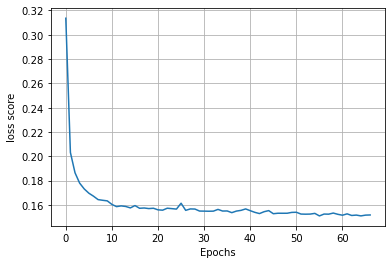

In [20]:
plt.plot(dt.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('loss score')
plt.grid()
plt.show()